In [73]:
import math

import matplotlib.axes
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import seaborn as sns
import numpy as np

In [74]:
def plot(name : str, filename : str):

    df = pd.read_csv(filename)

    fig, ax = plt.subplots(1, 5, figsize=(40, 10))

    fig.suptitle(name)

    impedance = np.array(df['Impedance'])
    phase = np.array(df['Phase'])
    real = impedance * np.cos(np.radians(phase))
    imaginary = impedance * np.sin(np.radians(phase))
    frequency = np.array(df['Frequency'])

    series_resistance = np.abs(impedance) * np.cos(np.radians(phase))
    series_capacitance = -1 / (frequency * 2 * math.pi * np.abs(impedance) * np.sin(np.radians(phase)))

    parallel_resistance = np.abs(impedance) / np.cos(phase)
    parallel_capacitance = np.divide(-np.sin(phase), (np.abs(impedance) * 2 * math.pi * frequency))

    sns.lineplot(ax=ax[0], x=real, y=imaginary)
    ax[0].set_xlabel('Real (Ω)')
    ax[0].set_ylabel('Imaginary (Ω)')
    ax[0].title.set_text('Real vs. Imaginary')

    sns.lineplot(ax=ax[1], x=phase, y=impedance)
    ax[1].title.set_text('Phase vs. Impedance')
    ax[1].set_xlabel('Phase (°)')
    ax[1].set_ylabel('Impedance (Ω)')

    sns.lineplot(ax=ax[2], x=frequency, y=impedance)
    ax[2].title.set_text('Frequency vs. Impedance')
    ax[2].set_xlabel('Frequency (Hz)')
    ax[2].set_ylabel('Impedance (Ω)')

    sns.lineplot(ax=ax[3], x=series_resistance, y=series_capacitance)
    ax[3].title.set_text('Series Resistance vs. Series Capacitance')
    ax[3].set_xlabel('Resistance (Ω)')
    ax[3].set_ylabel('Capacitance (F)')

    sns.lineplot(ax=ax[4], x=parallel_capacitance, y=parallel_resistance)
    ax[4].title.set_text('Parallel Resistance vs. Parallel Capacitance')
    ax[4].set_xlabel('Resistance (Ω)')
    ax[4].set_ylabel('Capacitance (F)')

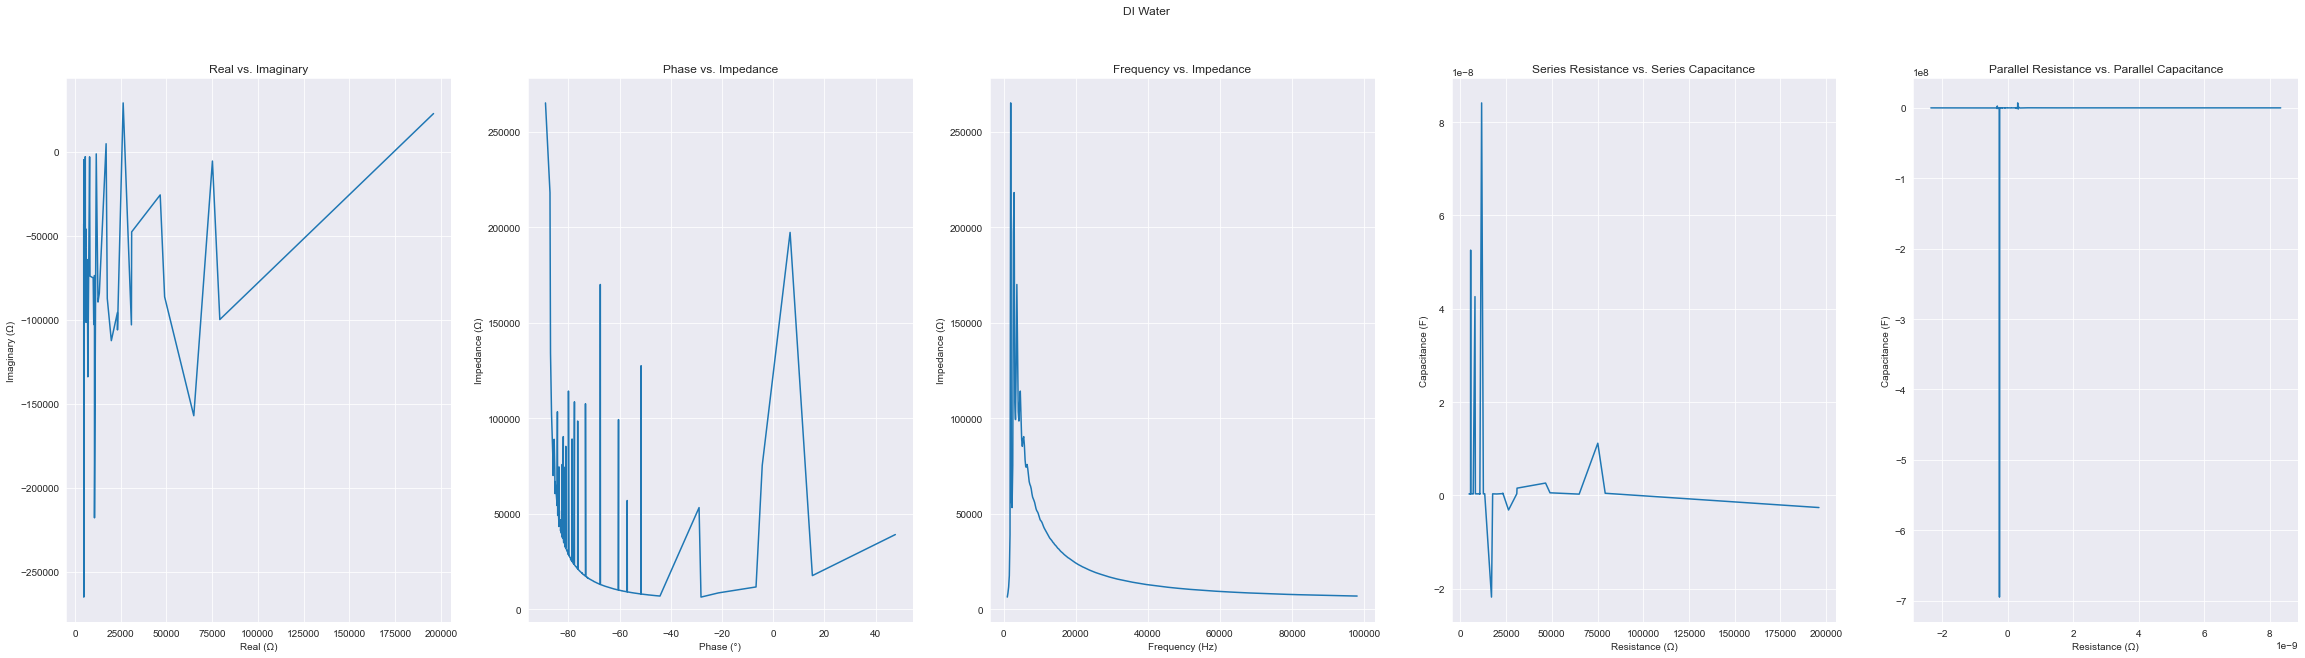

In [75]:
plot("DI Water", "seriesrc3.csv")